## **ФИО:** Цыбулько Даниил Викторович
## **Группа:** М8О-208Б-22

В этом файле содержится описание к набору данных.

В этом наборе данных вам предстоит решить актуальную задачу для поисковиков: нужно оценить насколько привлекателен веб-ресурс

по некоторому набору факторов.

В наборе данных представлено 8000 записей о различных анонимизированных доменах и соответствующие оценки привлекательности(числовые)

Нужно понять насколько домен привлекателен по остальным факторам.

Описание столбцов:

category - категория к которой относится сайт

clicks - кол-во кликов по домену

likes - кол-во лайков поставленных домену

buys - кол-во покупок совершенных на домене

4xx_errors - кол-во ошибок с кодом 4хх за последние 6 мес

5xx_errors - кол-во ошибок с кодом 5хх за последние 6 мес

complaints_count - кол-во жалоб на домен

average_dwelltime - среднее время проведенное пользователем на домене

date_of_registration - дата регистрации домена

source_attractiveness - привлекательность домена(таргет)

========== Пояснение к задаче ==========

Ваша задача предстоит не только в написании кода обучения модели. Глобально вы должны предоставить

ноутбук с полноценным анализом данных, очисткой данных, сделать выводы на основе графического анализа.

За отсутствие надлежащего оформления будут снижаться баллы. В критических случаях - лаба не будет принята.

## Импортируем все, что нам нужно

In [1023]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

## Загружаем наши данные

In [1024]:
!wget https://raw.githubusercontent.com/DaniilTsybulko/ML_Labs_MAI/refs/heads/main/lab2/train.csv

--2025-01-09 14:12:12--  https://raw.githubusercontent.com/DaniilTsybulko/ML_Labs_MAI/refs/heads/main/lab2/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935899 (914K) [text/plain]
Saving to: ‘train.csv.25’

train.csv.25        100%[===================>] 913.96K  --.-KB/s    in 0.04s   

2025-01-09 14:12:12 (20.5 MB/s) - ‘train.csv.25’ saved [935899/935899]



In [1025]:
df = pd.read_csv("train.csv")

In [1026]:
df

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
...,...,...,...,...,...,...,...,...,...,...,...
7995,361,information_source,1468601.0,474524.0,0,61307,83928,16841,4.191481,0.017470,2023-06-20 19:48:01.783634440
7996,2621,information_source,93172.0,6418.0,0,3418,705,0,3.745192,-0.019069,2024-07-22 08:45:41.700070757
7997,2605,information_source,82916.0,0.0,0,4302,1718,1007,5.837475,-0.061523,2024-06-17 05:44:08.100200436
7998,1231,social,823896.0,105666.0,0,0,2892,267,11.994037,0.131620,2023-06-11 02:53:14.377302808


In [1027]:
df = df.drop_duplicates()

## Анализ данных




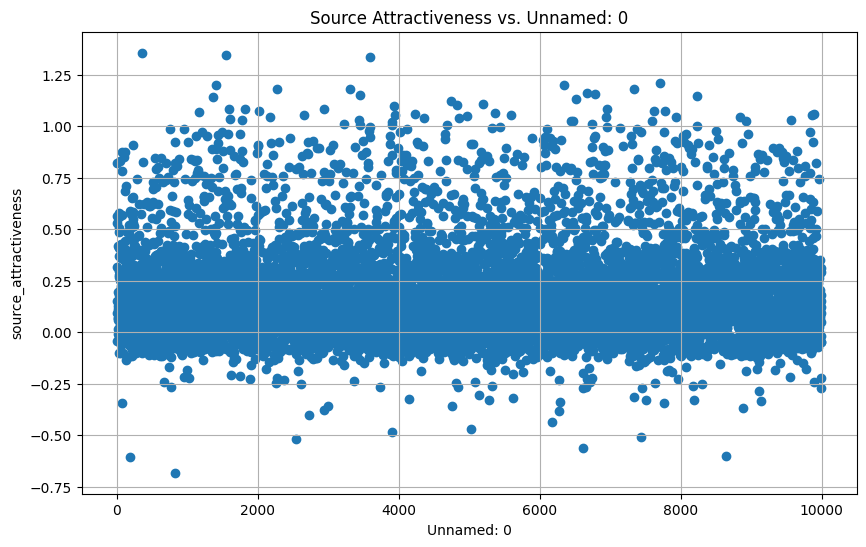

In [1028]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unnamed: 0'], df['source_attractiveness'])
plt.xlabel('Unnamed: 0')
plt.ylabel('source_attractiveness')
plt.title('Source Attractiveness vs. Unnamed: 0')
plt.grid(True)
plt.show()

увидели выбросы и убрали их


In [1029]:
df = df[df["source_attractiveness"] < 1]
df = df[df["source_attractiveness"] > -0.20]

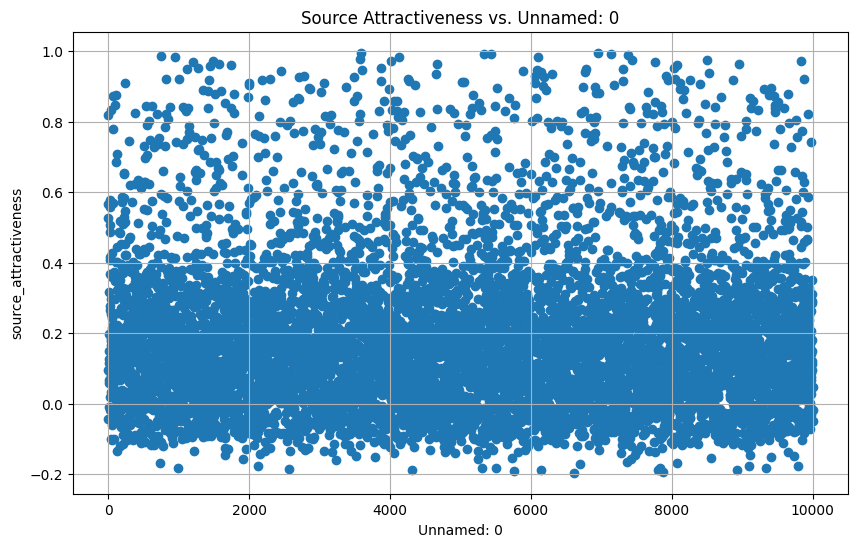

In [1030]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unnamed: 0'], df['source_attractiveness'])
plt.xlabel('Unnamed: 0')
plt.ylabel('source_attractiveness')
plt.title('Source Attractiveness vs. Unnamed: 0')
plt.grid(True)
plt.show()

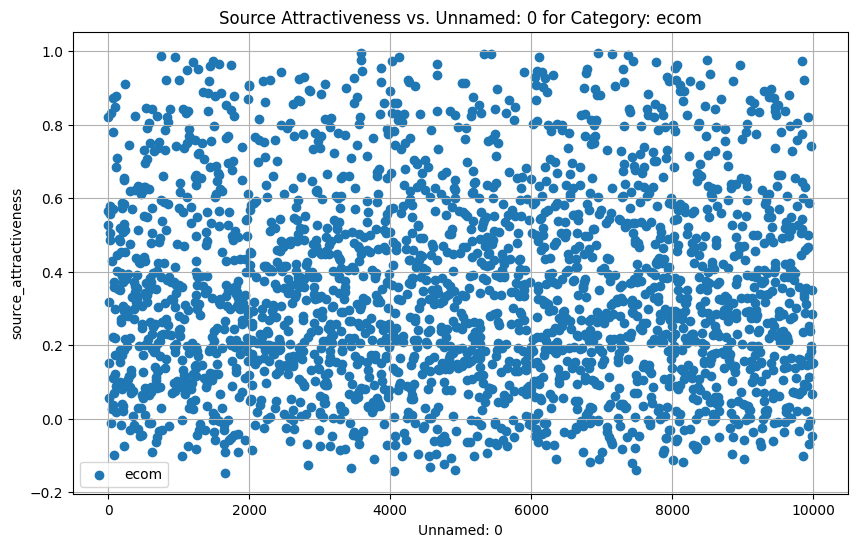

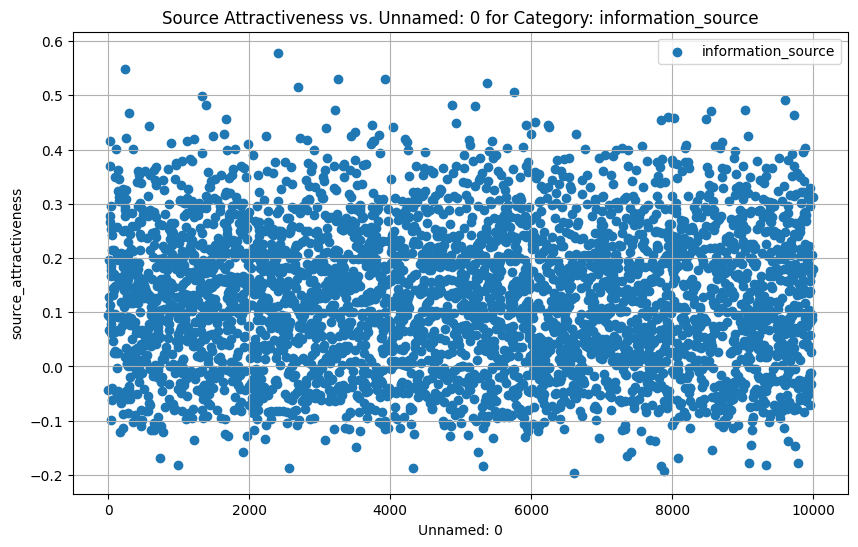

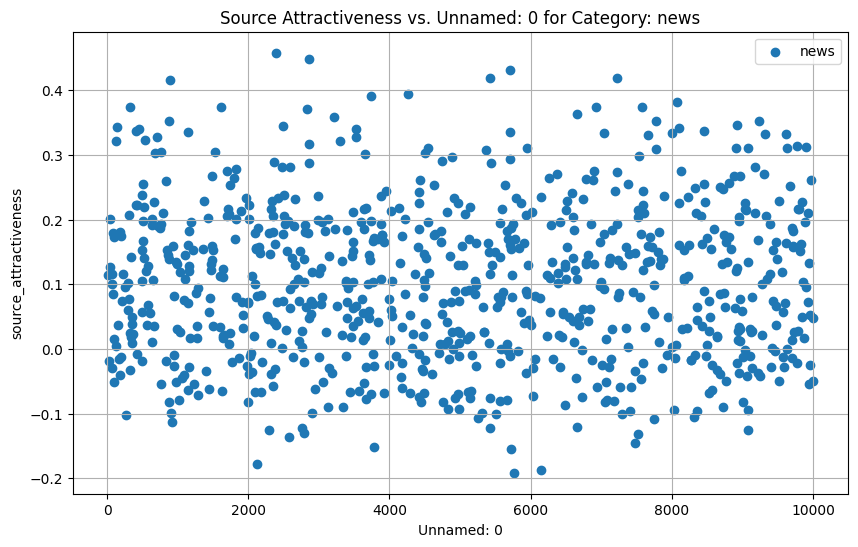

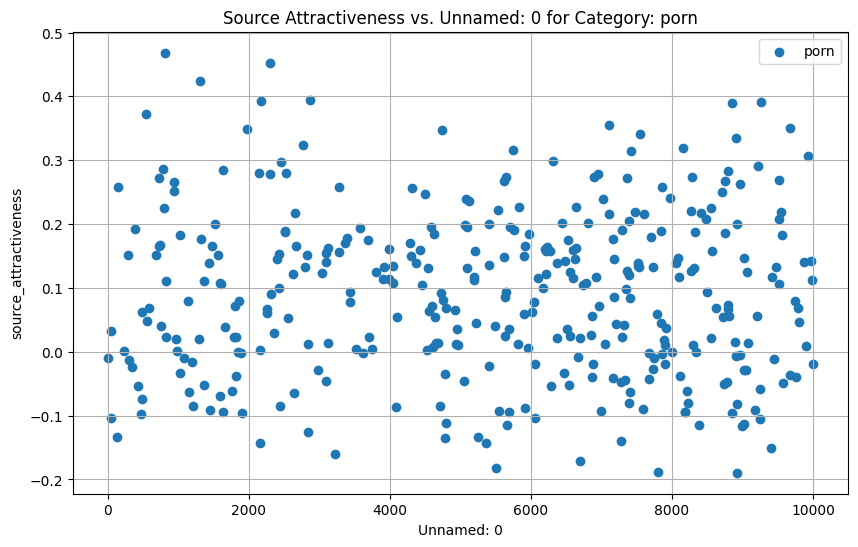

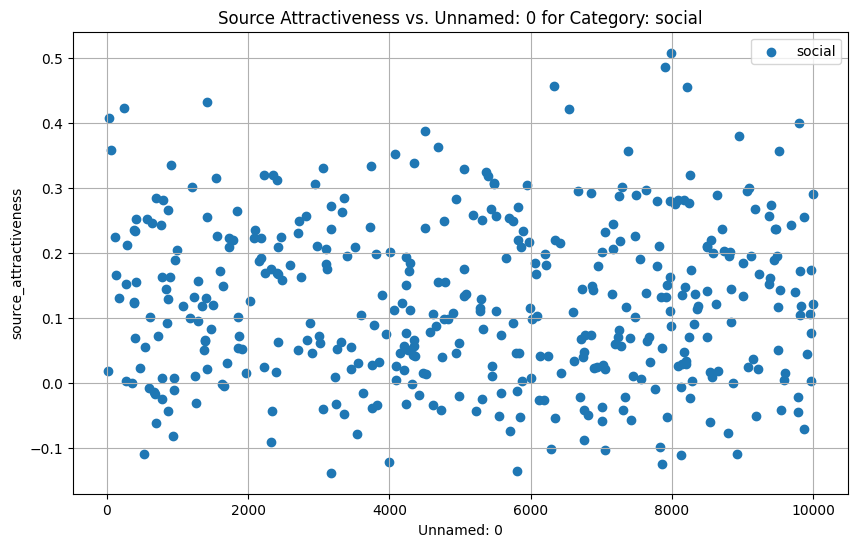

In [1031]:
for category in df['category'].unique():
    subset = df[df['category'] == category]
    plt.figure(figsize=(10, 6))
    plt.scatter(subset['Unnamed: 0'], subset['source_attractiveness'], label=category)
    plt.xlabel('Unnamed: 0')
    plt.ylabel('source_attractiveness')
    plt.title(f'Source Attractiveness vs. Unnamed: 0 for Category: {category}')
    plt.grid(True)
    plt.legend()
    plt.show()

Можем заметить, что ecom имеет другое распределение в отличие от остальных категорий, которые лежат внутри интервала [0.5, -0.2].

Следовательно, лучше ecom и остальные катеогрии разделаить на 2 датасета и обучать их своими моделями

In [1032]:
ecom_df = df[df["category"] == "ecom"]

In [1033]:
other_df = df[df["category"] != "ecom"]

Посмотрим информацию о наших датафреймах

In [1034]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2393 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2393 non-null   int64  
 1   category               2393 non-null   object 
 2   clicks                 2302 non-null   float64
 3   likes                  2278 non-null   float64
 4   buys                   2393 non-null   int64  
 5   4xx_errors             2393 non-null   int64  
 6   5xx_errors             2393 non-null   int64  
 7   complaints_count       2228 non-null   object 
 8   average_dwelltime      2393 non-null   float64
 9   source_attractiveness  2393 non-null   float64
 10  date_of_registration   2393 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 224.3+ KB


In [1035]:
other_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5491 entries, 1 to 7998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5491 non-null   int64  
 1   category               5491 non-null   object 
 2   clicks                 5313 non-null   float64
 3   likes                  5232 non-null   float64
 4   buys                   5491 non-null   int64  
 5   4xx_errors             5491 non-null   int64  
 6   5xx_errors             5491 non-null   int64  
 7   complaints_count       5188 non-null   object 
 8   average_dwelltime      5491 non-null   float64
 9   source_attractiveness  5491 non-null   float64
 10  date_of_registration   5491 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 514.8+ KB


Заметим, что у нас есть пропуски в данных

In [1036]:
other_df["category"].value_counts()

,count
category,
information_source,3922
news,796
social,412
porn,361


In [1037]:
other_df["complaints_count"].value_counts()

,count
complaints_count,
0,1160
-,271
49,7
464,6
1053,6
...,...
1670,1
3620,1
2141,1


In [1038]:
ecom_df["complaints_count"].value_counts()

,count
complaints_count,
0,388
-,127
1023,4
288,4
1028,3
...,...
1294,1
445,1
7052,1


## Пайплан обработки данных


1) сделать One-Hot-Encoding category для other_df и удаление этого столбца для ecom_df

2) date_of_registration перевести в формат дней, где нулевая точка- создание самого старого сайта, т.к. лин рег в sklearn не может обработать это

3) complaints_count перевести в формат float64 и заполнить пропуски медианным значением по категориям

4) заполнить пропуски clicks                 

5) заполнить пропуски likes

6) обработать выбросы

7) добавить новые фичи связанные с частотой действий

## Сначала обработаем датасет other_df

In [1039]:
other_df

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,2023-04-26 05:40:15.012475568
...,...,...,...,...,...,...,...,...,...,...,...
7994,5931,information_source,4221099.0,1204744.0,0,336212,24270,8234,0.451923,0.115761,2023-11-26 01:52:45.125399716
7995,361,information_source,1468601.0,474524.0,0,61307,83928,16841,4.191481,0.017470,2023-06-20 19:48:01.783634440
7996,2621,information_source,93172.0,6418.0,0,3418,705,0,3.745192,-0.019069,2024-07-22 08:45:41.700070757
7997,2605,information_source,82916.0,0.0,0,4302,1718,1007,5.837475,-0.061523,2024-06-17 05:44:08.100200436


In [1040]:
print(other_df['category'].isnull().sum())

0


### OHE "category"

In [1041]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

onehot_columns = encoder.fit_transform(other_df[['category']])

encoded_df = pd.DataFrame(
    onehot_columns,
    columns=encoder.get_feature_names_out(['category']),
    index=other_df.index
)

other_df = pd.concat([other_df, encoded_df], axis=1)

In [1042]:
other_df

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,category_news,category_porn,category_social
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816,0.0,0.0,0.0
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135,0.0,0.0,0.0
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095,1.0,0.0,0.0
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838,0.0,0.0,0.0
6,4553,porn,99712.0,0.0,0,0,15178,3725,20.786928,0.063572,2023-04-26 05:40:15.012475568,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,5931,information_source,4221099.0,1204744.0,0,336212,24270,8234,0.451923,0.115761,2023-11-26 01:52:45.125399716,0.0,0.0,0.0
7995,361,information_source,1468601.0,474524.0,0,61307,83928,16841,4.191481,0.017470,2023-06-20 19:48:01.783634440,0.0,0.0,0.0
7996,2621,information_source,93172.0,6418.0,0,3418,705,0,3.745192,-0.019069,2024-07-22 08:45:41.700070757,0.0,0.0,0.0
7997,2605,information_source,82916.0,0.0,0,4302,1718,1007,5.837475,-0.061523,2024-06-17 05:44:08.100200436,0.0,0.0,0.0


### Заполним пропуски в данных медианой внутри каждой категории

clicks

<Axes: xlabel='clicks', ylabel='Count'>

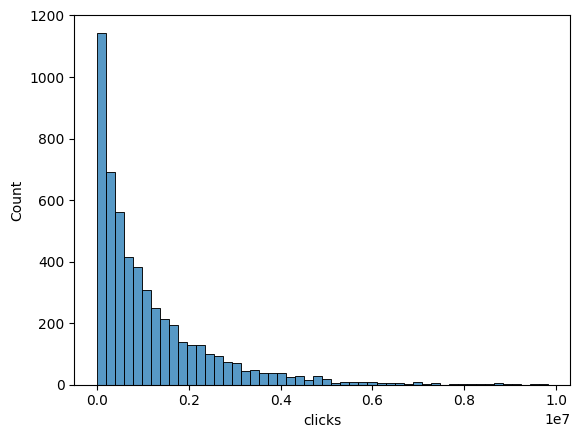

In [1043]:
sns.histplot(other_df['clicks'], bins = 50)

In [1044]:
other_df["clicks"] = other_df['clicks'].fillna(other_df.groupby("category")['clicks'].transform('median'))

<Axes: xlabel='clicks', ylabel='Count'>

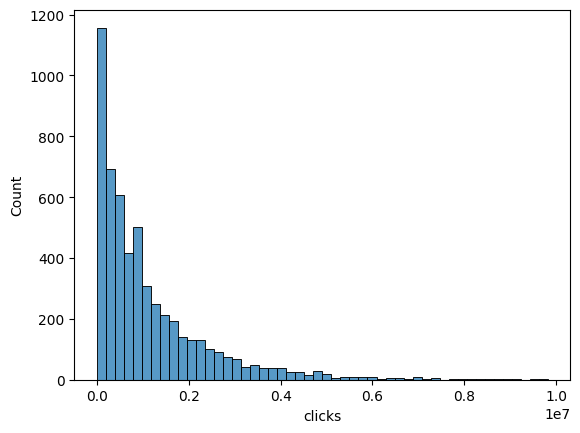

In [1045]:
sns.histplot(other_df['clicks'], bins = 50)

likes

<Axes: xlabel='likes', ylabel='Count'>

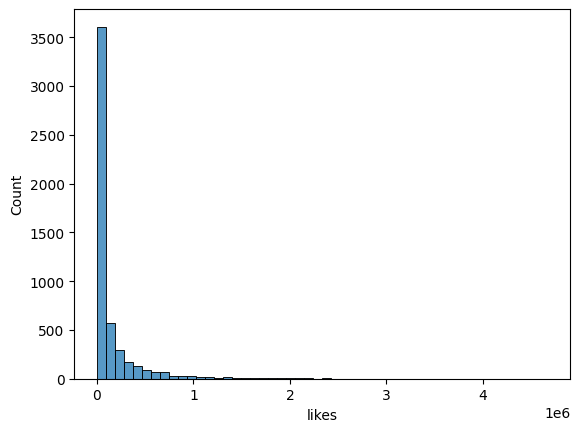

In [1046]:
sns.histplot(other_df['likes'], bins = 50)

In [1047]:
other_df["likes"] = other_df['likes'].fillna(other_df.groupby("category")['likes'].transform('median'))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='likes', ylabel='Count'>

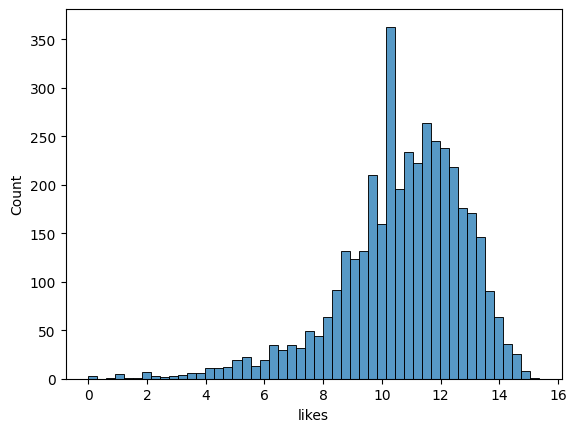

In [1048]:
sns.histplot(np.log(other_df['likes']), bins = 50)

complaints_count перевести в формат float64 и заполнить пропуски медианным значением по категориям

In [1049]:
other_df['complaints_count'] = pd.to_numeric(other_df['complaints_count'].replace('-', np.nan), errors='coerce')
other_df['complaints_count'] = other_df.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))
other_df['complaints_count'] = other_df['complaints_count'].astype('float64')

In [1050]:
other_df["complaints_count"].value_counts()

,count
complaints_count,
0.0,1160
1277.0,415
1460.0,85
1009.0,42
529.0,38
...,...
1670.0,1
3620.0,1
2141.0,1


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='complaints_count', ylabel='Count'>

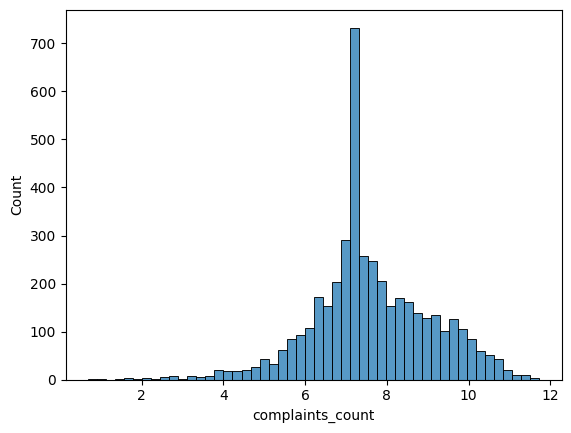

In [1051]:
sns.histplot(np.log(other_df['complaints_count']), bins = 50)

Перевод date_of_registration в datetime

### Создадим новые частотные фичи, для этого возьмем дату которая является как бы сегодняшним днем и посчитаем для каждого сайта дни с его основания до этой даты


In [1052]:
other_df['date_of_registration'] = pd.to_datetime(other_df['date_of_registration'], errors='coerce')

other_df['date_of_registration'] = other_df['date_of_registration'].dt.floor('D')

analysis_date = pd.to_datetime('2025-01-01')

other_df['days_since_creation'] = (analysis_date - other_df['date_of_registration']).dt.days

other_df['date_of_registration'] = other_df['date_of_registration'].dt.strftime('%Y-%m-%d')

In [1053]:
other_df

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,category_news,category_porn,category_social,days_since_creation
1,2047,information_source,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,2024-07-19,0.0,0.0,0.0,166
2,1118,information_source,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,2024-07-13,0.0,0.0,0.0,172
3,4992,news,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,2024-09-10,1.0,0.0,0.0,113
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,2024-05-26,0.0,0.0,0.0,220
6,4553,porn,99712.0,0.0,0,0,15178,3725.0,20.786928,0.063572,2023-04-26,0.0,1.0,0.0,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,5931,information_source,4221099.0,1204744.0,0,336212,24270,8234.0,0.451923,0.115761,2023-11-26,0.0,0.0,0.0,402
7995,361,information_source,1468601.0,474524.0,0,61307,83928,16841.0,4.191481,0.017470,2023-06-20,0.0,0.0,0.0,561
7996,2621,information_source,93172.0,6418.0,0,3418,705,0.0,3.745192,-0.019069,2024-07-22,0.0,0.0,0.0,163
7997,2605,information_source,82916.0,0.0,0,4302,1718,1007.0,5.837475,-0.061523,2024-06-17,0.0,0.0,0.0,198


### Создадим фичи клики, лайки, ошибки и количество жалоб на домен

In [1054]:
other_df["avg_clicks"] = other_df["clicks"] / other_df["days_since_creation"]
other_df["avg_likes"] = other_df["likes"] / other_df["days_since_creation"]
other_df["avg_complaints_count"] = other_df["complaints_count"] / other_df["days_since_creation"]

### Удаляем category и buys, т.к. нам больше оно не пригодится

In [1055]:
other_df = other_df.drop(columns=["category", "buys", "date_of_registration", "Unnamed: 0"])

In [1056]:
other_df

,clicks,likes,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,category_news,category_porn,category_social,days_since_creation,avg_clicks,avg_likes,avg_complaints_count
1,874840.0,21100.0,12872,0,0.0,10.721619,-0.022317,0.0,0.0,0.0,166,5270.120482,127.108434,0.000000
2,571210.0,94707.0,0,7420,0.0,1.922243,0.046396,0.0,0.0,0.0,172,3320.988372,550.622093,0.000000
3,89534.0,924.0,834,0,0.0,2.149243,-0.093360,1.0,0.0,0.0,113,792.336283,8.176991,0.000000
4,1043953.0,289288.0,58375,20260,3948.0,3.764965,0.027303,0.0,0.0,0.0,220,4745.240909,1314.945455,17.945455
6,99712.0,0.0,0,15178,3725.0,20.786928,0.063572,0.0,1.0,0.0,616,161.870130,0.000000,6.047078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,4221099.0,1204744.0,336212,24270,8234.0,0.451923,0.115761,0.0,0.0,0.0,402,10500.246269,2996.875622,20.482587
7995,1468601.0,474524.0,61307,83928,16841.0,4.191481,0.017470,0.0,0.0,0.0,561,2617.827094,845.853832,30.019608
7996,93172.0,6418.0,3418,705,0.0,3.745192,-0.019069,0.0,0.0,0.0,163,571.607362,39.374233,0.000000
7997,82916.0,0.0,4302,1718,1007.0,5.837475,-0.061523,0.0,0.0,0.0,198,418.767677,0.000000,5.085859


<Axes: xlabel='source_attractiveness', ylabel='Count'>

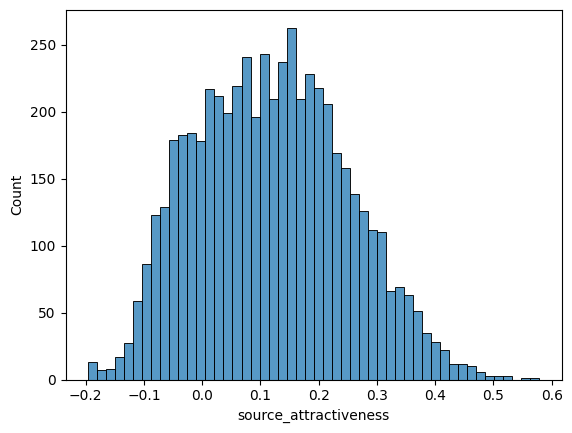

In [1057]:
sns.histplot(other_df['source_attractiveness'], bins = 50)

In [1058]:
correlation_matrix = other_df.corr()

In [1059]:
correlation_matrix

,clicks,likes,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,category_news,category_porn,category_social,days_since_creation,avg_clicks,avg_likes,avg_complaints_count
clicks,1.000000,0.559520,0.649236,0.400393,0.430568,-0.071272,0.084046,-0.083266,-0.188334,-0.062969,0.107610,0.699188,0.456080,0.322666
likes,0.559520,1.000000,0.259505,0.148724,0.161858,-0.037359,0.252479,-0.125923,-0.099053,-0.044888,0.080147,0.346058,0.818198,0.117980
4xx_errors,0.649236,0.259505,1.000000,0.310892,0.380026,-0.085727,0.016321,0.112649,-0.083006,-0.134860,0.093449,0.397841,0.186778,0.263438
5xx_errors,0.400393,0.148724,0.310892,1.000000,0.955187,-0.046374,-0.212951,0.051008,-0.050450,-0.085777,0.074539,0.230351,0.117893,0.746571
complaints_count,0.430568,0.161858,0.380026,0.955187,1.000000,-0.050071,-0.197588,0.056948,-0.051621,-0.089120,0.077808,0.243725,0.123935,0.782245
average_dwelltime,-0.071272,-0.037359,-0.085727,-0.046374,-0.050071,1.000000,0.080107,-0.070860,0.170745,0.481052,-0.008368,-0.060183,-0.041559,-0.038690
source_attractiveness,0.084046,0.252479,0.016321,-0.212951,-0.197588,0.080107,1.000000,-0.054053,-0.058653,0.012027,0.768951,-0.304961,0.039133,-0.364260
category_news,-0.083266,-0.125923,0.112649,0.051008,0.056948,-0.070860,-0.054053,1.000000,-0.109228,-0.117273,0.002127,-0.074541,-0.117699,0.046126
category_porn,-0.188334,-0.099053,-0.083006,-0.050450,-0.051621,0.170745,-0.058653,-0.109228,1.000000,-0.075553,-0.014472,-0.162479,-0.091772,-0.048922
category_social,-0.062969,-0.044888,-0.134860,-0.085777,-0.089120,0.481052,0.012027,-0.117273,-0.075553,1.000000,-0.003152,-0.050212,-0.042863,-0.080794


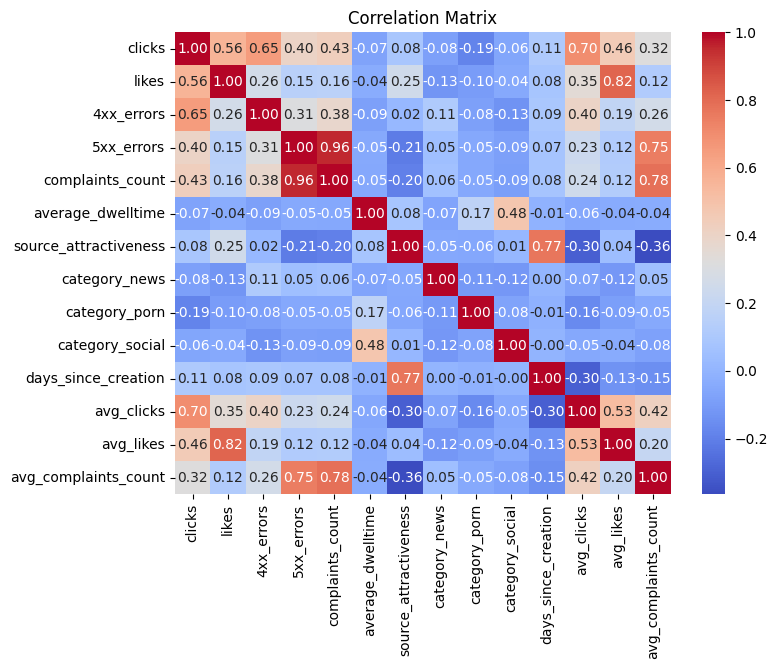

In [1060]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

есть корреляция, но мы будем использоватьм модель с регуляризацией, поэтому это не должно сильно влиять

## Делаем такие же манипуляции с ecom_df, только не удаляем buys и делаем avg_buys

In [1061]:
ecom_df

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
5,5505,ecom,3060369.0,0.0,1945683,51293,0,NaN,8.586621,0.640110,2022-07-25 16:59:56.675929416
7,1176,ecom,31677060.0,8760379.0,0,924098,0,8519,8.066347,0.080541,2024-02-19 13:16:17.401183524
9,9772,ecom,1695855.0,0.0,1601683,78271,0,1171,9.834370,0.757402,2023-07-10 23:20:54.166954000
10,3492,ecom,1726730.0,1022561.0,548138,14895,18118,3668,5.436714,0.476799,2023-06-20 13:46:22.839963712
...,...,...,...,...,...,...,...,...,...,...,...
7975,6181,ecom,NaN,4666283.0,6127488,460792,0,4022,20.870676,0.467366,2023-09-23 20:10:52.118963656
7977,4348,ecom,5042924.0,1274898.0,5042924,174661,133724,28645,1.525583,0.904862,2022-02-25 13:55:21.369148560
7987,4858,ecom,9206957.0,0.0,4496093,447953,43524,11756,1.872118,0.501125,2022-08-04 11:15:02.606881992
7990,699,ecom,1465768.0,158540.0,247116,12447,560,0,5.109422,0.082981,2024-08-18 08:10:50.394532203


In [1062]:
ecom_df.loc[:, "clicks"] = ecom_df['clicks'].fillna(ecom_df.groupby("category")['clicks'].transform('median'))

In [1063]:
ecom_df.loc[:, "likes"] = ecom_df['likes'].fillna(ecom_df.groupby("category")['likes'].transform('median'))

In [1064]:
ecom_df.loc[:, "buys"] = ecom_df['buys'].fillna(ecom_df.groupby("category")['buys'].transform('median'))

In [1065]:
ecom_df.loc[:, 'complaints_count'] = pd.to_numeric(ecom_df['complaints_count'].replace('-', np.nan), errors='coerce')
ecom_df.loc[:, 'complaints_count'] = ecom_df.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))
ecom_df.loc[:, 'complaints_count'] = ecom_df['complaints_count'].astype('float64')

<ipython-input-1065-a53f367acfdb>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ecom_df.loc[:, 'complaints_count'] = ecom_df.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))


In [1066]:
ecom_df['date_of_registration'] = pd.to_datetime(ecom_df['date_of_registration'], errors='coerce')

ecom_df['date_of_registration'] = ecom_df['date_of_registration'].dt.floor('D')

analysis_date = pd.to_datetime('2025-01-01')

ecom_df['days_since_creation'] = (analysis_date - ecom_df['date_of_registration']).dt.days

ecom_df['date_of_registration'] = ecom_df['date_of_registration'].dt.strftime('%Y-%m-%d')

<ipython-input-1066-b5c086770a67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df['date_of_registration'] = pd.to_datetime(ecom_df['date_of_registration'], errors='coerce')
<ipython-input-1066-b5c086770a67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df['date_of_registration'] = ecom_df['date_of_registration'].dt.floor('D')
<ipython-input-1066-b5c086770a67>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [1067]:
ecom_df.loc[:, "avg_clicks"] = ecom_df["clicks"] / ecom_df["days_since_creation"]
ecom_df.loc[:, "avg_likes"] = ecom_df["likes"] / ecom_df["days_since_creation"]
ecom_df.loc[:, "avg_complaints_count"] = ecom_df["complaints_count"] / ecom_df["days_since_creation"]
ecom_df.loc[:, "avg_buys"] = ecom_df["buys"] / ecom_df["days_since_creation"]

<ipython-input-1067-11d1444f5872>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df.loc[:, "avg_clicks"] = ecom_df["clicks"] / ecom_df["days_since_creation"]
<ipython-input-1067-11d1444f5872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df.loc[:, "avg_likes"] = ecom_df["likes"] / ecom_df["days_since_creation"]
<ipython-input-1067-11d1444f5872>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [1068]:
ecom_df = ecom_df.drop(columns=["date_of_registration", "category", "Unnamed: 0"])

In [1069]:
ecom_df

,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,days_since_creation,avg_clicks,avg_likes,avg_complaints_count,avg_buys
0,6488536.0,251065.5,0,82221,0,0.0,18.450527,0.461750,1716,3781.198135,146.308566,0.0,0.000000
5,3060369.0,0.0,1945683,51293,0,1816.0,8.586621,0.640110,891,3434.757576,0.000000,2.038159,2183.707071
7,31677060.0,8760379.0,0,924098,0,8519.0,8.066347,0.080541,317,99927.634069,27635.264984,26.873817,0.000000
9,1695855.0,0.0,1601683,78271,0,1171.0,9.834370,0.757402,541,3134.667283,0.000000,2.16451,2960.597043
10,1726730.0,1022561.0,548138,14895,18118,3668.0,5.436714,0.476799,561,3077.950089,1822.746881,6.538324,977.073084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,4139989.5,4666283.0,6127488,460792,0,4022.0,20.870676,0.467366,466,8884.097639,10013.482833,8.630901,13149.115880
7977,5042924.0,1274898.0,5042924,174661,133724,28645.0,1.525583,0.904862,1041,4844.307397,1224.685879,27.516811,4844.307397
7987,9206957.0,0.0,4496093,447953,43524,11756.0,1.872118,0.501125,881,10450.575482,0.000000,13.343927,5103.397276
7990,1465768.0,158540.0,247116,12447,560,0.0,5.109422,0.082981,136,10777.705882,1165.735294,0.0,1817.029412


## Делаем модели


In [1070]:
X = other_df.drop(columns=["source_attractiveness"])
y = other_df["source_attractiveness"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = PowerTransformer(method='yeo-johnson')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [1000, 5000]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", test_mse)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Лучший результат (MSE): -0.0036367896094100403
MSE на тестовых данных: 0.003632021083218155


In [1071]:
X = other_df.drop(columns=["source_attractiveness"])
y = other_df["source_attractiveness"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = PowerTransformer(method='yeo-johnson')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [1000, 5000]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", test_mse)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Лучший результат (MSE): -0.0036367896094100403
MSE на тестовых данных: 0.003632021083218155


In [1072]:
X = ecom_df.drop(columns=["source_attractiveness"])
y = ecom_df["source_attractiveness"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = PowerTransformer(method='yeo-johnson')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = ElasticNet()

param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [1000, 5000]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("MSE на тестовых данных:", test_mse)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Лучший результат (MSE): -0.022909073267255574
MSE на тестовых данных: 0.024338234631423195


## Добавляем  тестовые данные и обрабатываем их

In [1073]:
!wget https://raw.githubusercontent.com/DaniilTsybulko/ML_Labs_MAI/refs/heads/main/lab2/test.csv

--2025-01-09 14:12:20--  https://raw.githubusercontent.com/DaniilTsybulko/ML_Labs_MAI/refs/heads/main/lab2/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195361 (191K) [text/plain]
Saving to: ‘test.csv.5’

test.csv.5          100%[===================>] 190.78K  --.-KB/s    in 0.03s   

2025-01-09 14:12:20 (6.79 MB/s) - ‘test.csv.5’ saved [195361/195361]



In [1074]:
test_df = pd.read_csv("test.csv")

In [1075]:
ecom_df_test = test_df[test_df["category"] == "ecom"]

In [1076]:
other_df_test = test_df[test_df["category"] != "ecom"]
other_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 1 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1397 non-null   int64  
 1   category              1397 non-null   object 
 2   clicks                1348 non-null   float64
 3   likes                 1336 non-null   float64
 4   buys                  1397 non-null   int64  
 5   4xx_errors            1397 non-null   int64  
 6   5xx_errors            1397 non-null   int64  
 7   complaints_count      1315 non-null   object 
 8   average_dwelltime     1397 non-null   float64
 9   date_of_registration  1397 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 120.1+ KB


In [1077]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

onehot_columns = encoder.fit_transform(other_df_test[['category']])

encoded_df = pd.DataFrame(
    onehot_columns,
    columns=encoder.get_feature_names_out(['category']),
    index=other_df_test.index
)

other_df_test = pd.concat([other_df_test, encoded_df], axis=1)
other_df_test["clicks"] = other_df_test['clicks'].fillna(other_df_test.groupby("category")['clicks'].transform('median'))
other_df_test["likes"] = other_df_test['likes'].fillna(other_df_test.groupby("category")['likes'].transform('median'))
other_df_test['complaints_count'] = pd.to_numeric(other_df_test['complaints_count'].replace('-', np.nan), errors='coerce')
other_df_test['complaints_count'] = other_df_test.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))
other_df_test['complaints_count'] = other_df_test['complaints_count'].astype('float64')
other_df_test.set_index('ID', inplace=True)
other_df_test['date_of_registration'] = pd.to_datetime(other_df_test['date_of_registration'], errors='coerce')
other_df_test['date_of_registration'] = other_df_test['date_of_registration'].dt.floor('D')
analysis_date = pd.to_datetime('2025-01-01')
other_df_test['days_since_creation'] = (analysis_date - other_df_test['date_of_registration']).dt.days
other_df_test['date_of_registration'] = other_df_test['date_of_registration'].dt.strftime('%Y-%m-%d')
other_df_test["avg_clicks"] = other_df_test["clicks"] / other_df_test["days_since_creation"]
other_df_test["avg_likes"] = other_df_test["likes"] / other_df_test["days_since_creation"]
other_df_test["avg_complaints_count"] = other_df_test["complaints_count"] / other_df_test["days_since_creation"]
other_df_test = other_df_test.drop(columns=["category", "buys", "date_of_registration"])

In [1078]:
other_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 1 to 1999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clicks                1397 non-null   float64
 1   likes                 1397 non-null   float64
 2   4xx_errors            1397 non-null   int64  
 3   5xx_errors            1397 non-null   int64  
 4   complaints_count      1397 non-null   float64
 5   average_dwelltime     1397 non-null   float64
 6   category_news         1397 non-null   float64
 7   category_porn         1397 non-null   float64
 8   category_social       1397 non-null   float64
 9   days_since_creation   1397 non-null   int64  
 10  avg_clicks            1397 non-null   float64
 11  avg_likes             1397 non-null   float64
 12  avg_complaints_count  1397 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 152.8 KB


In [1079]:
ecom_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 1998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    603 non-null    int64  
 1   category              603 non-null    object 
 2   clicks                582 non-null    float64
 3   likes                 577 non-null    float64
 4   buys                  603 non-null    int64  
 5   4xx_errors            603 non-null    int64  
 6   5xx_errors            603 non-null    int64  
 7   complaints_count      568 non-null    object 
 8   average_dwelltime     603 non-null    float64
 9   date_of_registration  603 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 51.8+ KB


In [1080]:
ecom_df_test.loc[:, "clicks"] = ecom_df_test['clicks'].fillna(ecom_df_test.groupby("category")['clicks'].transform('median'))
ecom_df_test.loc[:, "likes"] = ecom_df_test['likes'].fillna(ecom_df_test.groupby("category")['likes'].transform('median'))
ecom_df_test.loc[:, "buys"] = ecom_df_test['buys'].fillna(ecom_df_test.groupby("category")['buys'].transform('median'))
ecom_df_test.loc[:, 'complaints_count'] = pd.to_numeric(ecom_df_test['complaints_count'].replace('-', np.nan), errors='coerce')
ecom_df_test.loc[:, 'complaints_count'] = ecom_df_test.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))
ecom_df_test.loc[:, 'complaints_count'] = ecom_df_test['complaints_count'].astype('float64')
ecom_df_test['date_of_registration'] = pd.to_datetime(ecom_df_test['date_of_registration'], errors='coerce')

ecom_df_test['date_of_registration'] = ecom_df_test['date_of_registration'].dt.floor('D')

analysis_date = pd.to_datetime('2025-01-01')

ecom_df_test['days_since_creation'] = (analysis_date - ecom_df_test['date_of_registration']).dt.days

ecom_df_test['date_of_registration'] = ecom_df_test['date_of_registration'].dt.strftime('%Y-%m-%d')
ecom_df_test.loc[:, "avg_clicks"] = ecom_df_test["clicks"] / ecom_df_test["days_since_creation"]
ecom_df_test.loc[:, "avg_likes"] = ecom_df_test["likes"] / ecom_df_test["days_since_creation"]
ecom_df_test.loc[:, "avg_complaints_count"] = ecom_df_test["complaints_count"] / ecom_df_test["days_since_creation"]
ecom_df_test.loc[:, "avg_buys"] = ecom_df_test["buys"] / ecom_df_test["days_since_creation"]
ecom_df_test = ecom_df_test.drop(columns=["date_of_registration", "category"])
ecom_df_test.set_index('ID', inplace=True)

<ipython-input-1080-fe60a472d86f>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ecom_df_test.loc[:, 'complaints_count'] = ecom_df_test.groupby('category')['complaints_count'].transform(lambda x: x.fillna(x.median()))
<ipython-input-1080-fe60a472d86f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom_df_test['date_of_registration'] = pd.to_datetime(ecom_df_test['date_of_registration'], errors='coerce')
<ipython-input-1080-fe60a472d86f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [1081]:
ecom_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clicks                603 non-null    float64
 1   likes                 603 non-null    float64
 2   buys                  603 non-null    int64  
 3   4xx_errors            603 non-null    int64  
 4   5xx_errors            603 non-null    int64  
 5   complaints_count      603 non-null    object 
 6   average_dwelltime     603 non-null    float64
 7   days_since_creation   603 non-null    int64  
 8   avg_clicks            603 non-null    float64
 9   avg_likes             603 non-null    float64
 10  avg_complaints_count  603 non-null    object 
 11  avg_buys              603 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 61.2+ KB


## Обучаем модели на всей тестовой выборке и делаем предикт на тестовых данных

In [1082]:
X_train = other_df.drop(columns=["source_attractiveness"])
y_train = other_df["source_attractiveness"]
X_test = other_df_test

scaler = PowerTransformer(method='yeo-johnson')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = ElasticNet()
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [1000, 5000]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Лучший результат (MSE): -0.003628797035695896


In [1083]:
submission = pd.DataFrame({
    'ID': other_df_test.index,
    'predicted': y_pred
})

submission.to_csv('submission_other.csv', index=False)

In [1084]:
X_train = ecom_df.drop(columns=["source_attractiveness"])
y_train = ecom_df["source_attractiveness"]
X_test = ecom_df_test

scaler = PowerTransformer(method='yeo-johnson')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = ElasticNet()
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1],
    'max_iter': [1000, 5000]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Лучшие параметры: {'alpha': 0.1, 'l1_ratio': 0.1, 'max_iter': 1000}
Лучший результат (MSE): -0.023001071942349904


In [1085]:
submission_ecom = pd.DataFrame({
    'ID': ecom_df_test.index,
    'predicted': y_pred
})

submission_ecom.to_csv('submission_ecom.csv', index=False)

## Делаем общий сабмит файл

In [1086]:
file1 = pd.read_csv('submission_ecom.csv')
file2 = pd.read_csv('submission_other.csv')

combined_df = pd.concat([file1, file2], ignore_index=True)

sorted_df = combined_df.sort_values(by='ID')

sorted_df.to_csv('combined_sorted.csv', index=False)


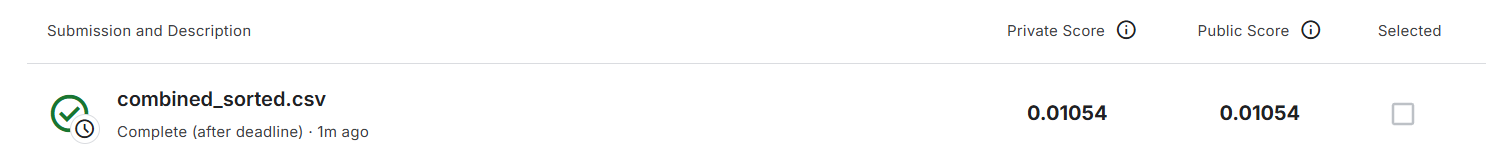